In [2]:
import pandas as pd
import re

In [3]:
df = pd.read_csv("data/Seating_Locations.csv")
pd.set_option('display.max_columns', None)
df.head()

,the_geom,ObjectID,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,Category,Installati,Address,GeocodeAdd,Street,CrossStree,Borough,ComDist,BusRoute,BID,Latitude,Longitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac,SeatingTyp
0,POINT (-73.98384524707862 40.66433221370896),444,3.0,Brooklyn,306.0,39.0,44.0,21.0,9.0,1921,General,05/09/2013,412 7th Avenue,412 7th Avenue,7th Avenue,13th & 14th Street,Brooklyn,306,B67,Not Applicable,40.664332,-73.983845,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS 1.0
1,POINT (-73.98150878289019 40.67476959289031),554,3.0,Brooklyn,306.0,39.0,52.0,25.0,7.0,1003,General,01/17/2013,249 Fifth Avenue,249 Fifth Avenue,5th Avenue,Garfield Street and Carroll Street,Brooklyn,306,B63,Fifth Avenue,40.674770,-73.981509,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS 1.0
2,POINT (-73.97765557314123 40.72556926663563),1999,1.0,Manhattan,103.0,2.0,74.0,27.0,12.0,1938,General,07/23/2013,157 Avenue C,155-157 Avenue C,Avenue C,9th & 10th Street,Manhattan,103,Not Applicable,Not Applicable,40.725569,-73.977656,East Village,AE,NaN,1.0,BACKED 1.0
3,POINT (-73.78932962160363 40.59289898540395),2231,4.0,Queens,414.0,31.0,31.0,10.0,5.0,67,sbs,02/05/2019,219 Beach 59th St,219 Beach 59th St,Arverne Blvd,Beach 59th Street & Beach 62nd Street,Queens,55,q53,NaN,40.592899,-73.789330,Rockaway Beach-Arverne-Edgemere,AE,NaN,1.0,LEANING BAR
4,POINT (-73.89717766190195 40.862273157905065),2162,2.0,Bronx,205.0,15.0,78.0,33.0,15.0,1194,BID,10/22/2012,South side Overpass at East Fordham Rd and Gra...,"40°51'44.5""N 73°53'49.8""W",East Fordham Road,Grand Concourse East and West,Bronx,205,Not Applicable,Fordham Road,40.862273,-73.897178,Fordham Heights,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKED 1.0


In [4]:
df.dtypes

the_geom       object
ObjectID        int64
BoroCode      float64
BoroName       object
BoroCD        float64
CounDist      float64
AssemDist     float64
StSenDist     float64
CongDist      float64
SiteID          int64
Category       object
Installati     object
Address        object
GeocodeAdd     object
Street         object
CrossStree     object
Borough        object
ComDist         int64
BusRoute       object
BID            object
Latitude      float64
Longitude     float64
NTAName        object
FEMAFldz       object
FEMAFldT       object
HrcEvac       float64
SeatingTyp     object
dtype: object

In [5]:
# Get a datetime column
df['date']=pd.to_datetime(df['Installati'])
# Cleaning types of benches column
df['SeatingTyp']=df.SeatingTyp.str.replace(" 1.0","").str.replace(" 2.0","")
df.head()

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_65325/3849312665.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['SeatingTyp']=df.SeatingTyp.str.replace(" 1.0","").str.replace(" 2.0","")


,the_geom,ObjectID,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,Category,Installati,Address,GeocodeAdd,Street,CrossStree,Borough,ComDist,BusRoute,BID,Latitude,Longitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac,SeatingTyp,date
0,POINT (-73.98384524707862 40.66433221370896),444,3.0,Brooklyn,306.0,39.0,44.0,21.0,9.0,1921,General,05/09/2013,412 7th Avenue,412 7th Avenue,7th Avenue,13th & 14th Street,Brooklyn,306,B67,Not Applicable,40.664332,-73.983845,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS,2013-05-09
1,POINT (-73.98150878289019 40.67476959289031),554,3.0,Brooklyn,306.0,39.0,52.0,25.0,7.0,1003,General,01/17/2013,249 Fifth Avenue,249 Fifth Avenue,5th Avenue,Garfield Street and Carroll Street,Brooklyn,306,B63,Fifth Avenue,40.674770,-73.981509,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS,2013-01-17
2,POINT (-73.97765557314123 40.72556926663563),1999,1.0,Manhattan,103.0,2.0,74.0,27.0,12.0,1938,General,07/23/2013,157 Avenue C,155-157 Avenue C,Avenue C,9th & 10th Street,Manhattan,103,Not Applicable,Not Applicable,40.725569,-73.977656,East Village,AE,NaN,1.0,BACKED,2013-07-23
3,POINT (-73.78932962160363 40.59289898540395),2231,4.0,Queens,414.0,31.0,31.0,10.0,5.0,67,sbs,02/05/2019,219 Beach 59th St,219 Beach 59th St,Arverne Blvd,Beach 59th Street & Beach 62nd Street,Queens,55,q53,NaN,40.592899,-73.789330,Rockaway Beach-Arverne-Edgemere,AE,NaN,1.0,LEANING BAR,2019-02-05
4,POINT (-73.89717766190195 40.862273157905065),2162,2.0,Bronx,205.0,15.0,78.0,33.0,15.0,1194,BID,10/22/2012,South side Overpass at East Fordham Rd and Gra...,"40°51'44.5""N 73°53'49.8""W",East Fordham Road,Grand Concourse East and West,Bronx,205,Not Applicable,Fordham Road,40.862273,-73.897178,Fordham Heights,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKED,2012-10-22


<AxesSubplot: xlabel='date'>

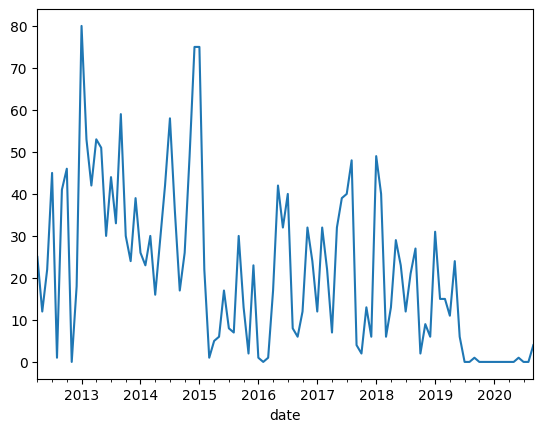

In [6]:
# Plot newly installed benches per month
df.resample('M', on='date').ObjectID.count().plot()

<AxesSubplot: xlabel='date'>

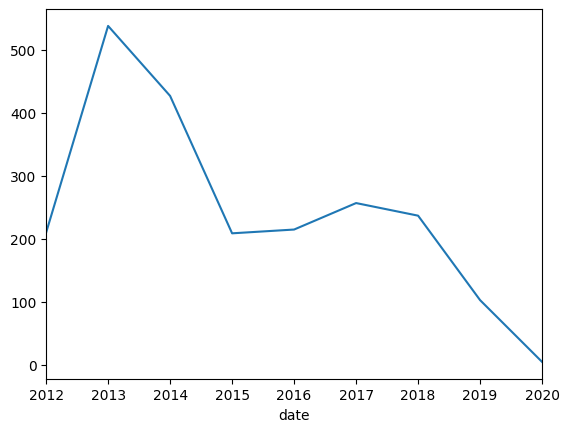

In [7]:
# Plot newly installed benches per year
df.resample('Y', on='date').ObjectID.count().plot()

In [8]:
df.SeatingTyp.value_counts()

BACKED         1463
BACKLESS        688
LEANING BAR      75
Unknown          15
Name: SeatingTyp, dtype: int64

<AxesSubplot: xlabel='date'>

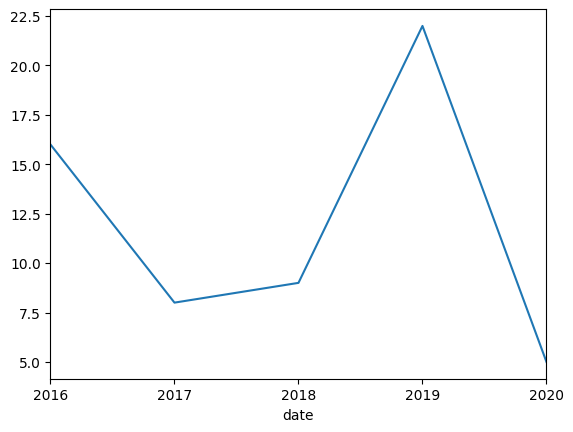

In [9]:
# I'm interested in seeing when the city starting installing benches that are less comfortable (backless and leaning bar)
df[df['SeatingTyp']=='LEANING BAR'].resample('Y', on='date').ObjectID.count().plot()

<AxesSubplot: xlabel='date'>

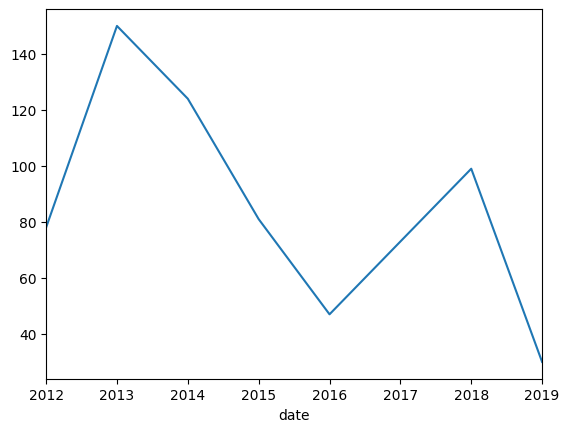

In [10]:
df[df['SeatingTyp']=='BACKLESS'].resample('Y', on='date').ObjectID.count().plot()

<AxesSubplot: xlabel='date'>

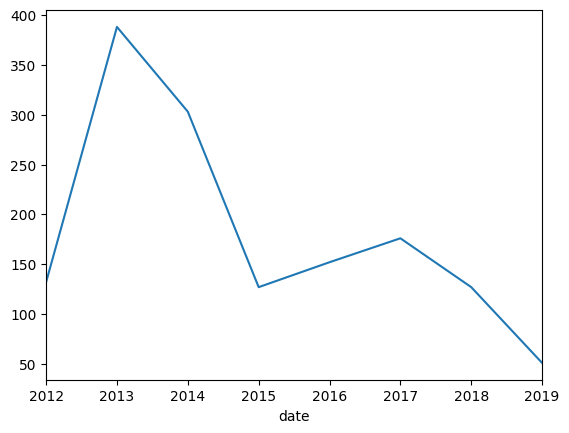

In [11]:
df[df['SeatingTyp']=='BACKED'].resample('Y', on='date').ObjectID.count().plot()

In [12]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head(2)

,the_geom,ObjectID,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,SiteID,Category,Installati,Address,GeocodeAdd,Street,CrossStree,Borough,ComDist,BusRoute,BID,Latitude,Longitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac,SeatingTyp,date,year
0,POINT (-73.98384524707862 40.66433221370896),444,3.0,Brooklyn,306.0,39.0,44.0,21.0,9.0,1921,General,05/09/2013,412 7th Avenue,412 7th Avenue,7th Avenue,13th & 14th Street,Brooklyn,306,B67,Not Applicable,40.664332,-73.983845,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS,2013-05-09,2013.0
1,POINT (-73.98150878289019 40.67476959289031),554,3.0,Brooklyn,306.0,39.0,52.0,25.0,7.0,1003,General,01/17/2013,249 Fifth Avenue,249 Fifth Avenue,5th Avenue,Garfield Street and Carroll Street,Brooklyn,306,B63,Fifth Avenue,40.674770,-73.981509,Park Slope,X,AREA OF MINIMAL FLOOD HAZARD,NaN,BACKLESS,2013-01-17,2013.0


In [13]:
df.BoroName.value_counts()

Brooklyn         807
Manhattan        529
Queens           516
Bronx            330
Staten Island     57
Name: BoroName, dtype: int64

In [14]:
df.to_csv("data/cleaned_df.csv", index=False)

In [15]:
%load_ext rpy2.ipython

In [16]:
%%R 
require(tidyverse)
require(ggplot2)

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [17]:
%%R -i df -w 600 -h 400
# Plot bench installation over the year by type
year_summary <- df %>%  
  filter(SeatingTyp != "Unknown")%>%
  group_by(year, SeatingTyp) %>% 
  summarise(count = n())

by_year <- ggplot(year_summary,aes(x=year,y=count,color = SeatingTyp))+
    geom_line() +
#     facet_wrap(~SeatingTyp)+
    theme_minimal()+
  labs(x = "Installation Year", y = "Number of Benches Installed")

by_year

# ggsave("bench-by-year.pdf")

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.
Saving 8.33 x 5.56 in image


In [18]:
%%R -w 1000 -h 300
# Plot bench installation over the year by borough
ggplot(df%>%  
  filter(BoroName != "NA"),aes(x=year, fill=BoroName))+
    geom_bar() +
    facet_wrap(~BoroName,ncol=5)+
    theme_minimal()+
  labs(x = "Installation Year", y = "Number of Benches Installed")
# ggsave("bench-by-boro.pdf")

Saving 13.9 x 4.17 in image


In [19]:
%%R -i df
# Plot bench installation over the year by borough

ggplot(df%>%  
  filter(BoroName != "NA"),aes(x=BoroName,fill=BoroName))+
    geom_bar() +
#     facet_wrap(~br)+
    theme_minimal()+
  labs(x = "Borough", y = "Number of Benches Installed")
# ggsave("bench-all-boro.pdf")

Saving 6.67 x 6.67 in image
